In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
%matplotlib inline

In [206]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","CLIP LENGTH","OFFSET","DURATION","MAX FREQ","MIN FREQ","SAMPLE RATE","LAST MOD BY"])

In [207]:
frame

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,alarce
...,...,...,...,...,...,...,...,...
31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,JacobGlennAyers
31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,JacobGlennAyers
31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,JacobGlennAyers
31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,JacobGlennAyers


In [208]:
CLIP_LENGTHS = frame.groupby("IN FILE")[["CLIP LENGTH"]].max()
SUM_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].sum()

MEDIAN_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].median()
MEDIAN_DURATIONS = MEDIAN_DURATIONS.rename(columns={'DURATION': 'MEDIAN DURATION'})

NUMBER_ANN = frame.groupby("IN FILE")[["OFFSET"]].count()
NUMBER_ANN = NUMBER_ANN.rename(columns = {'OFFSET':'OFFSET COUNT'})

MED_DIST_BW_ANNS = frame.copy(True)

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.sort_values(['IN FILE','OFFSET'])
MED_DIST_BW_ANNS['ENDSET'] = MED_DIST_BW_ANNS['OFFSET'] + MED_DIST_BW_ANNS['DURATION']

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS[['IN FILE','CLIP LENGTH','OFFSET','ENDSET','LAST MOD BY']]

MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS.loc[MED_DIST_BW_ANNS['IN FILE'].shift(-1) == MED_DIST_BW_ANNS['IN FILE'], 'ENDSET']
MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS['PREV END'].shift()

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.fillna(0)
MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] = MED_DIST_BW_ANNS['OFFSET'] - MED_DIST_BW_ANNS['PREV END']

MED_DIST_BW_ANNS['OVERLAP'] = MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'].loc[MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] < 0]

OVER_LAP = MED_DIST_BW_ANNS.groupby('IN FILE')[['OVERLAP']].count()
OVER_LAP = OVER_LAP.rename(columns = {'OVERLAP':'OVERLAP COUNT'})

DIST_BETWEEN_ANN_PREV = MED_DIST_BW_ANNS.groupby('IN FILE')[['DIST BETWEEN ANN PREV']].median()
DIST_BETWEEN_ANN_PREV = DIST_BETWEEN_ANN_PREV.rename(columns={'DIST BETWEEN ANN PREV': 'MEDIAN DIST B/W ANNS'})

LAST_MOD_BY = MED_DIST_BW_ANNS.groupby('IN FILE')[['LAST MOD BY']].max()

WHITE_SPACE = frame.copy(True)
DUR = WHITE_SPACE.groupby(['IN FILE'])[['DURATION']].sum()
DUR = DUR.rename(columns = {'DURATION':'SUM DURATION'})
LEN = WHITE_SPACE.groupby(['IN FILE'])[['CLIP LENGTH']].max()
WHITE_SPACE = LEN.join(DUR)
WHITE_SPACE['WHITE SPACE'] = WHITE_SPACE['CLIP LENGTH'] - WHITE_SPACE['SUM DURATION']

WHITE_SPACE = WHITE_SPACE.join(OVER_LAP)
WHITE_SPACE = WHITE_SPACE.join(DIST_BETWEEN_ANN_PREV)
WHITE_SPACE = WHITE_SPACE.join(MEDIAN_DURATIONS)
WHITE_SPACE = WHITE_SPACE.join(NUMBER_ANN)
WHITE_SPACE = WHITE_SPACE.join(LAST_MOD_BY)
WHITE_SPACE.reset_index(inplace=True)
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce
...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers


In [209]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    # print(spec)
    # print(spec[:-1])
    spec_to = '-'.join(spec[:-2])
    return spec_to

WHITE_SPACE['Genus'] = WHITE_SPACE.apply (lambda row: species(row), axis=1)

# diff_genus = frame[frame['Genus']].value_counts().index_values()#.to_list()
# print(diff_genus[:3])

# WHITE_SPACE = WHITE_SPACE[(WHITE_SPACE['Genus'] ==  'Himantopus-mexicanus') | (WHITE_SPACE['Genus'] ==  'Ramphocaenus-sticturus')] # or 
len(WHITE_SPACE['Genus'].unique())
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce,Aburria
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce,Aburria
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce,Accipiter
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce,Accipiter
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce,Accipiter
...,...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce,Zimmerius
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce,Zimmerius
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers,Zonotrichia
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers,Zonotrichia


In [210]:
genus = WHITE_SPACE['Genus'].unique()
sampled_genus = random.sample(list(genus),5)
sampled_genus

['Tachyphonus', 'Gallinago', 'Thraupis', 'Netta', 'Patagioenas']

In [211]:
filtered_df = WHITE_SPACE[WHITE_SPACE['Genus'].isin(sampled_genus)]
filtered_df

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
851,Gallinago-paraguaiae-504232.wav,9.32571,6.0046,3.32111,0,1.25640,3.00230,2,weszhen,Gallinago
1347,Netta-peposaca-23277.wav,6.76800,1.2655,5.50250,0,1.16520,0.63275,2,hjagarla,Netta
1348,Netta-peposaca-48344.wav,15.96080,6.9162,9.04460,0,0.25770,0.81470,9,hjagarla,Netta
1349,Netta-peposaca-51738.wav,5.79918,1.8788,3.92038,0,1.15845,0.93940,2,hjagarla,Netta
1483,Patagioenas-cayennensis-330375.wav,198.00000,142.3499,55.65010,0,1.80000,6.71000,21,hjagarla,Patagioenas
1484,Patagioenas-cayennensis-454953.wav,8.22857,4.4357,3.79287,0,0.27420,0.33000,11,dnelson,Patagioenas
1485,Patagioenas-fasciata-238765.wav,39.70610,2.4398,37.26630,0,14.01915,1.21990,2,hjagarla,Patagioenas
1486,Patagioenas-fasciata-257594.wav,12.72160,0.9655,11.75610,0,4.40085,0.48275,2,kushagra1067,Patagioenas
1487,Patagioenas-fasciata-73442.wav,132.31000,27.9100,104.40000,0,0.86000,0.44000,63,hjagarla,Patagioenas
1488,Patagioenas-fasciata-74477.wav,61.60800,17.8495,43.75850,0,1.00995,0.43000,40,kushagra1067,Patagioenas


In [212]:
knn_data = filtered_df[['LAST MOD BY','Genus','OFFSET COUNT','MEDIAN DURATION']].copy(True)
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION
851,weszhen,Gallinago,2,3.00230
1347,hjagarla,Netta,2,0.63275
1348,hjagarla,Netta,9,0.81470
1349,hjagarla,Netta,2,0.93940
1483,hjagarla,Patagioenas,21,6.71000
1484,dnelson,Patagioenas,11,0.33000
1485,hjagarla,Patagioenas,2,1.21990
1486,kushagra1067,Patagioenas,2,0.48275
1487,hjagarla,Patagioenas,63,0.44000
1488,kushagra1067,Patagioenas,40,0.43000


In [213]:
from sklearn.cluster import KMeans

In [214]:
from sklearn.preprocessing import MinMaxScaler

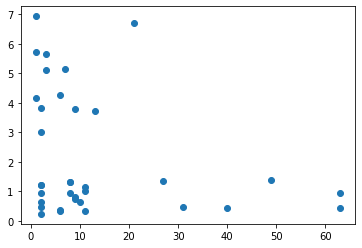

In [215]:
plt.scatter(knn_data['OFFSET COUNT'],knn_data['MEDIAN DURATION'])

In [216]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [217]:
y_predicted = km.fit_predict(knn_data[['OFFSET COUNT','MEDIAN DURATION']])
y_predicted

array([0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [218]:
knn_data['cluster'] = y_predicted
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION,cluster
851,weszhen,Gallinago,2,3.00230,0
1347,hjagarla,Netta,2,0.63275,0
1348,hjagarla,Netta,9,0.81470,0
1349,hjagarla,Netta,2,0.93940,0
1483,hjagarla,Patagioenas,21,6.71000,2
1484,dnelson,Patagioenas,11,0.33000,0
1485,hjagarla,Patagioenas,2,1.21990,0
1486,kushagra1067,Patagioenas,2,0.48275,0
1487,hjagarla,Patagioenas,63,0.44000,1
1488,kushagra1067,Patagioenas,40,0.43000,2


No handles with labels found to put in legend.


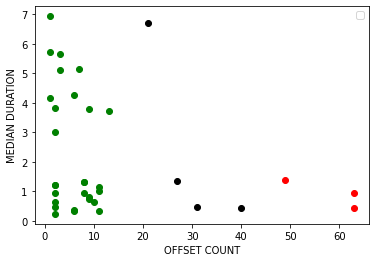

In [219]:
df1 = knn_data[knn_data.cluster == 0]
df2 = knn_data[knn_data.cluster == 1]
df3 = knn_data[knn_data.cluster == 2]

plt.scatter(df1['OFFSET COUNT'],df1['MEDIAN DURATION'],color = 'green')
plt.scatter(df2['OFFSET COUNT'],df2['MEDIAN DURATION'],color = 'red')
plt.scatter(df3['OFFSET COUNT'],df3['MEDIAN DURATION'],color = 'black')

plt.xlabel('OFFSET COUNT')
plt.ylabel('MEDIAN DURATION')
plt.legend()
plt.show()

In [220]:
scaler = MinMaxScaler()

scaler.fit(knn_data[['MEDIAN DURATION']])
knn_data['MEDIAN DURATION'] = scaler.transform(knn_data[['MEDIAN DURATION']])

scaler.fit(knn_data[['OFFSET COUNT']])
knn_data['OFFSET COUNT'] = scaler.transform(knn_data[['OFFSET COUNT']])

In [221]:
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION,cluster
851,weszhen,Gallinago,0.016129,0.412905,0
1347,hjagarla,Netta,0.016129,0.059309,0
1348,hjagarla,Netta,0.129032,0.086461,0
1349,hjagarla,Netta,0.016129,0.105069,0
1483,hjagarla,Patagioenas,0.322581,0.966186,2
1484,dnelson,Patagioenas,0.161290,0.014132,0
1485,hjagarla,Patagioenas,0.016129,0.146927,0
1486,kushagra1067,Patagioenas,0.016129,0.036926,0
1487,hjagarla,Patagioenas,1.000000,0.030546,1
1488,kushagra1067,Patagioenas,0.629032,0.029054,2


In [222]:
km2 = KMeans(n_clusters = 5)
y_predicted = km2.fit_predict(knn_data[['OFFSET COUNT','MEDIAN DURATION']])
y_predicted

array([1, 0, 0, 0, 3, 0, 0, 0, 2, 4, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4,
       0, 2, 2, 1, 4, 0, 1, 1, 1, 3, 3, 3, 1])

In [223]:
knn_data['cluster'] = y_predicted
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION,cluster
851,weszhen,Gallinago,0.016129,0.412905,1
1347,hjagarla,Netta,0.016129,0.059309,0
1348,hjagarla,Netta,0.129032,0.086461,0
1349,hjagarla,Netta,0.016129,0.105069,0
1483,hjagarla,Patagioenas,0.322581,0.966186,3
1484,dnelson,Patagioenas,0.161290,0.014132,0
1485,hjagarla,Patagioenas,0.016129,0.146927,0
1486,kushagra1067,Patagioenas,0.016129,0.036926,0
1487,hjagarla,Patagioenas,1.000000,0.030546,2
1488,kushagra1067,Patagioenas,0.629032,0.029054,4


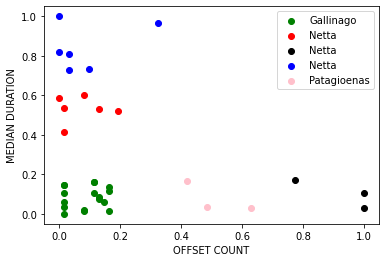

In [224]:
df1 = knn_data[knn_data.cluster == 0]
df2 = knn_data[knn_data.cluster == 1]
df3 = knn_data[knn_data.cluster == 2]
df4 = knn_data[knn_data.cluster == 3]
df5 = knn_data[knn_data.cluster == 4]

plt.scatter(df1['OFFSET COUNT'],df1['MEDIAN DURATION'],color = 'green')
plt.scatter(df2['OFFSET COUNT'],df2['MEDIAN DURATION'],color = 'red')
plt.scatter(df3['OFFSET COUNT'],df3['MEDIAN DURATION'],color = 'black')
plt.scatter(df4['OFFSET COUNT'],df4['MEDIAN DURATION'],color = 'blue')
plt.scatter(df5['OFFSET COUNT'],df5['MEDIAN DURATION'],color = 'pink')

plt.xlabel('OFFSET COUNT')
plt.ylabel('MEDIAN DURATION')
plt.legend(knn_data['Genus'])
plt.show()

In [234]:
import plotly.express as px 

fig = px.scatter(df1, x='OFFSET COUNT', y='MEDIAN DURATION',text = 'LAST MOD BY')

fig.show()